In [ ]:
## Michael Janke
## DSC478
## Assignment 3

## What follows is a somewhat incomplete submission. I struggled with this assignment, but it was partially
## my own doing; not anticipating having to address issues I was having with sample code which I asssume 
## were caused by differences in python/library versions.

## I'm submitting as is, a day late, so that I may move on to the remaining work for the class, hopefully 
## gaining a better understanding of what I missed here, as I go.

In [269]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt

from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [271]:
## 1.a - read in data

communityData = pd.read_csv('communities.csv', na_values=["?"])
communityData.head()

state        communityname  population  householdsize  racepctblack  \
0      8         Lakewoodcity        0.19           0.33          0.02   
1     53          Tukwilacity        0.00           0.16          0.12   
2     24         Aberdeentown        0.00           0.42          0.49   
3     34  Willingborotownship        0.04           0.77          1.00   
4     42    Bethlehemtownship        0.01           0.55          0.02   

   racePctWhite  racePctAsian  racePctHisp  agePct12t21  agePct12t29  \
0          0.90          0.12         0.17         0.34         0.47   
1          0.74          0.45         0.07         0.26         0.59   
2          0.56          0.17         0.04         0.39         0.47   
3          0.08          0.12         0.10         0.51         0.50   
4          0.95          0.09         0.05         0.38         0.38   

   agePct16t24  agePct65up  numbUrban  pctUrban  medIncome  pctWWage  \
0         0.29        0.32       0.20       1.0       0.37      0.72   
1         0.35        0.27       0.02       1.0       0.31      0.72   
2         0.28        0.32       0.00       0.0       0.30      0.58   
3         0.34        0.21       0.06       1.0       0.58      0.89   
4         0.23        0.36       0.02       0.9       0.50      0.72   

   pctWFarmSelf  pctWInvInc  pctWSocSec  pctWPubAsst  pctWRetire  medFamInc  \
0          0.34        0.60        0.29         0.15        0.43       0.39   
1          0.11        0.45        0.25         0.29        0.39       0.29   
2          0.19        0.39        0.38         0.40        0.84       0.28   
3          0.21        0.43        0.36         0.20        0.82       0.51   
4          0.16        0.68        0.44         0.11        0.71       0.46   

   perCapInc  whitePerCap  blackPerCap  indianPerCap  AsianPerCap  \
0       0.40         0.39         0.32          0.27         0.27   
1       0.37         0.38         0.33          0.16         0.30   
2       0.27         0.29         0.27          0.07         0.29   
3       0.36         0.40         0.39          0.16         0.25   
4       0.43         0.41         0.28          0.00         0.74   

   OtherPerCap  HispPerCap  NumUnderPov  PctPopUnderPov  PctLess9thGrade  \
0         0.36        0.41         0.08            0.19             0.10   
1         0.22        0.35         0.01            0.24             0.14   
2         0.28        0.39         0.01            0.27             0.27   
3         0.36        0.44         0.01            0.10             0.09   
4         0.51        0.48         0.00            0.06             0.25   

   PctNotHSGrad  PctBSorMore  PctUnemployed  PctEmploy  PctEmplManu  \
0          0.18         0.48           0.27       0.68         0.23   
1          0.24         0.30           0.27       0.73         0.57   
2          0.43         0.19           0.36       0.58         0.32   
3          0.25         0.31           0.33       0.71         0.36   
4          0.30         0.33           0.12       0.65         0.67   

   PctEmplProfServ  MalePctDivorce  MalePctNevMarr  FemalePctDiv  TotalPctDiv  \
0             0.41            0.68            0.40          0.75         0.75   
1             0.15            1.00            0.63          0.91         1.00   
2             0.29            0.63            0.41          0.71         0.70   
3             0.45            0.34            0.45          0.49         0.44   
4             0.38            0.22            0.27          0.20         0.21   

   PersPerFam  PctFam2Par  PctKids2Par  PctYoungKids2Par  PctTeen2Par  \
0        0.35        0.55         0.59              0.61         0.56   
1        0.29        0.43         0.47              0.60         0.39   
2        0.45        0.42         0.44              0.43         0.43   
3        0.75        0.65         0.54              0.83         0.65   
4        0.51        0.91         0.91              0.89         0

In [272]:
## Look for nulls

communityData.isnull().any()

state                    False
communityname            False
population               False
householdsize            False
racepctblack             False
racePctWhite             False
racePctAsian             False
racePctHisp              False
agePct12t21              False
agePct12t29              False
agePct16t24              False
agePct65up               False
numbUrban                False
pctUrban                 False
medIncome                False
pctWWage                 False
pctWFarmSelf             False
pctWInvInc               False
pctWSocSec               False
pctWPubAsst              False
pctWRetire               False
medFamInc                False
perCapInc                False
whitePerCap              False
blackPerCap              False
indianPerCap             False
AsianPerCap              False
OtherPerCap               True
HispPerCap               False
NumUnderPov              False
PctPopUnderPov           False
PctLess9thGrade          False
PctNotHS

In [273]:
## impute missing OtherPerCap
other_mean = communityData.OtherPerCap.mean()
communityData.OtherPerCap.fillna(other_mean, axis=0, inplace=True)

In [274]:
## recheck nulls
communityData.isnull().any().any()

False

In [275]:
communityData.describe()

state   population  householdsize  racepctblack  racePctWhite  \
count  1994.000000  1994.000000    1994.000000   1994.000000   1994.000000   
mean     28.683551     0.057593       0.463395      0.179629      0.753716   
std      16.397553     0.126906       0.163717      0.253442      0.244039   
min       1.000000     0.000000       0.000000      0.000000      0.000000   
25%      12.000000     0.010000       0.350000      0.020000      0.630000   
50%      34.000000     0.020000       0.440000      0.060000      0.850000   
75%      42.000000     0.050000       0.540000      0.230000      0.940000   
max      56.000000     1.000000       1.000000      1.000000      1.000000   

       racePctAsian  racePctHisp  agePct12t21  agePct12t29  agePct16t24  \
count   1994.000000  1994.000000  1994.000000  1994.000000  1994.000000   
mean       0.153681     0.144022     0.424218     0.493867     0.336264   
std        0.208877     0.232492     0.155196     0.143564     0.166505   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.040000     0.010000     0.340000     0.410000     0.250000   
50%        0.070000     0.040000     0.400000     0.480000     0.290000   
75%        0.170000     0.160000     0.470000     0.540000     0.360000   
max        1.000000     1.000000     1.000000     1.000000     1.000000   

        agePct65up    numbUrban     pctUrban    medIncome     pctWWage  \
count  1994.000000  1994.000000  1994.000000  1994.000000  1994.000000   
mean      0.423164     0.064072     0.696269     0.361123     0.558154   
std       0.179185     0.128256     0.444811     0.209362     0.182913   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.300000     0.000000     0.000000     0.200000     0.440000   
50%       0.420000     0.030000     1.000000     0.320000     0.560000   
75%       0.530000     0.070000     1.000000     0.490000     0.690000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       pctWFarmSelf   pctWInvInc   pctWSocSec  pctWPubAsst   pctWRetire  \
count   1994.000000  1994.000000  1994.000000  1994.000000  1994.000000   
mean       0.291570     0.495687     0.471133     0.317778     0.479248   
std        0.204108     0.178071     0.173619     0.222137     0.167564   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.160000     0.370000     0.350000     0.142500     0.360000   
50%        0.230000     0.480000     0.475000     0.260000     0.470000   
75%        0.370000     0.620000     0.580000     0.440000     0.580000   
max        1.000000     1.000000     1.000000     1.000000     1.000000   

         medFamInc    perCapInc  whitePerCap  blackPerCap  indianPerCap  \
count  1994.000000  1994.000000  1994.000000  1994.000000   1994.000000   
mean      0.375677     0.350251     0.368049     0.291098      0.203506   
std       0.198257     0.191109     0.186804     0.171593      0.164775   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.230000     0.220000     0.240000     0.172500      0.110000   
50%       0.330000     0.300000     0.320000     0.250000      0.170000   
75%       0.480000     0.430000     0.440000     0.380000      0.250000   
max       1.000000     1.000000     1.000000     1.000000      1.000000   

       AsianPerCap  OtherPerCap   HispPerCap  NumUnderPov  PctPopUnderPov  \
count  1994.000000  1994.000000  1994.000000  1994.000000     1994.000000   
mean      0.322357     0.284742     0.386279     0.055507        0.303024   
std       0.195411     0.190960     0.183081     0.127941        0.228474   
min       0.000000     0.000000     0.000000     0.000000        0.000000   
25%       0.190000     0.170000     0.260000     0.010000        0.110000   
50%       0.280000     0.250000     0.345000     0.020000        0.250000   
75%       0.400000     0.360000     0.480000     0.050000        0.450000   

In [276]:
## extract independent variables

communityRecords = communityData[['population','householdsize','racepctblack','racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up','numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst','pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap','HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed','PctEmploy','PctEmplManu','PctEmplProfServ','MalePctDivorce','MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumIlleg','PctIlleg','NumImmig','PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5','PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam','PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup','PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal','OwnOccHiQuart','RentLowQ','RentMedian','RentHighQ','MedRent','MedRentPctHousInc','MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState','PctSameHouse85','PctSameCity85','PctSameState85','LandArea','PopDens','PctUsePubTrans']]
communityRecords.head()

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0        0.19           0.33          0.02          0.90          0.12   
1        0.00           0.16          0.12          0.74          0.45   
2        0.00           0.42          0.49          0.56          0.17   
3        0.04           0.77          1.00          0.08          0.12   
4        0.01           0.55          0.02          0.95          0.09   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  numbUrban  \
0         0.17         0.34         0.47         0.29        0.32       0.20   
1         0.07         0.26         0.59         0.35        0.27       0.02   
2         0.04         0.39         0.47         0.28        0.32       0.00   
3         0.10         0.51         0.50         0.34        0.21       0.06   
4         0.05         0.38         0.38         0.23        0.36       0.02   

   pctUrban  medIncome  pctWWage  pctWFarmSelf  pctWInvInc  pctWSocSec  \
0       1.0       0.37      0.72          0.34        0.60        0.29   
1       1.0       0.31      0.72          0.11        0.45        0.25   
2       0.0       0.30      0.58          0.19        0.39        0.38   
3       1.0       0.58      0.89          0.21        0.43        0.36   
4       0.9       0.50      0.72          0.16        0.68        0.44   

   pctWPubAsst  pctWRetire  medFamInc  perCapInc  whitePerCap  blackPerCap  \
0         0.15        0.43       0.39       0.40         0.39         0.32   
1         0.29        0.39       0.29       0.37         0.38         0.33   
2         0.40        0.84       0.28       0.27         0.29         0.27   
3         0.20        0.82       0.51       0.36         0.40         0.39   
4         0.11        0.71       0.46       0.43         0.41         0.28   

   indianPerCap  AsianPerCap  OtherPerCap  HispPerCap  NumUnderPov  \
0          0.27         0.27         0.36        0.41         0.08   
1          0.16         0.30         0.22        0.35         0.01   
2          0.07         0.29         0.28        0.39         0.01   
3          0.16         0.25         0.36        0.44         0.01   
4          0.00         0.74         0.51        0.48         0.00   

   PctPopUnderPov  PctLess9thGrade  PctNotHSGrad  PctBSorMore  PctUnemployed  \
0            0.19             0.10          0.18         0.48           0.27   
1            0.24             0.14          0.24         0.30           0.27   
2            0.27             0.27          0.43         0.19           0.36   
3            0.10             0.09          0.25         0.31           0.33   
4            0.06             0.25          0.30         0.33           0.12   

   PctEmploy  PctEmplManu  PctEmplProfServ  MalePctDivorce  MalePctNevMarr  \
0       0.68         0.23             0.41            0.68            0.40   
1       0.73         0.57             0.15            1.00            0.63   
2       0.58         0.32             0.29            0.63            0.41   
3       0.71         0.36             0.45            0.34            0.45   
4       0.65         0.67             0.38            0.22            0.27   

   FemalePctDiv  TotalPctDiv  PersPerFam  PctFam2Par  PctKids2Par  \
0          0.75         0.75        0.35        0.55         0.59   
1          0.91         1.00        0.29        0.43         0.47   
2          0.71         0.70        0.45        0.42         0.44   
3          0.49         0.44        0.75        0.65         0.54   
4          0.20         0.21        0.51        0.91         0.91   

   PctYoungKids2Par  PctTeen2Par  PctWorkMomYoungKids  PctWorkMom  NumIlleg  \
0              0.61         0.56                 0.74        0.76      0.04   
1              0.60         0.39                 0.46        0.53      0.00   
2              0.43         0.43                 0.71        0.67      0.01   
3              0.83         0.65                 0.85        

In [277]:
## extract dependent variable

communityTarget = communityData[['ViolentCrimesPerPop']]
communityTarget.head()

ViolentCrimesPerPop
0                 0.20
1                 0.67
2                 0.43
3                 0.12
4                 0.03

In [308]:
## 1.b
## From Chapter 8 of Machine Learning in Action

def standRegres(xArr,yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print "This matrix is singular, cannot do inverse"
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [309]:
## Convert data frames to arrays
# In order to do multiple regression we need to add a column of 1s for x0

from numpy import *

xArr = np.array([np.concatenate((x,[1.0])) for x in np.array(communityRecords, dtype=float)])
yArr = np.squeeze(np.array(communityTarget, dtype=float).T)

print xArr[:10]


[[0.19 0.33 0.02 0.9  0.12 0.17 0.34 0.47 0.29 0.32 0.2  1.   0.37 0.72 0.34
  0.6  0.29 0.15 0.43 0.39 0.4  0.39 0.32 0.27 0.27 0.36 0.41 0.08 0.19 0.1
  0.18 0.48 0.27 0.68 0.23 0.41 0.68 0.4  0.75 0.75 0.35 0.55 0.59 0.61 0.56
  0.74 0.76 0.04 0.14 0.03 0.24 0.27 0.37 0.39 0.07 0.07 0.08 0.08 0.89 0.06
  0.14 0.13 0.33 0.39 0.28 0.55 0.09 0.51 0.5  0.21 0.71 0.52 0.05 0.26 0.65
  0.14 0.06 0.22 0.19 0.18 0.36 0.35 0.38 0.34 0.38 0.46 0.25 0.04 0.   0.12
  0.42 0.5  0.51 0.64 0.12 0.26 0.2  1.  ]
 [0.   0.16 0.12 0.74 0.45 0.07 0.26 0.59 0.35 0.27 0.02 1.   0.31 0.72 0.11
  0.45 0.25 0.29 0.39 0.29 0.37 0.38 0.33 0.16 0.3  0.22 0.35 0.01 0.24 0.14
  0.24 0.3  0.27 0.73 0.57 0.15 1.   0.63 0.91 1.   0.29 0.43 0.47 0.6  0.39
  0.46 0.53 0.   0.24 0.01 0.52 0.62 0.64 0.63 0.25 0.27 0.25 0.23 0.84 0.1
  0.16 0.1  0.17 0.29 0.17 0.26 0.2  0.82 0.   0.02 0.79 0.24 0.02 0.25 0.65
  0.16 0.   0.21 0.2  0.21 0.42 0.38 0.4  0.37 0.29 0.32 0.18 0.   0.   0.21
  0.5  0.34 0.6  0.52 0.02 0.12 0.4

In [310]:
print yArr[:10]

[0.2  0.67 0.43 0.12 0.03 0.14 0.03 0.55 0.53 0.15]


In [311]:
## Perform standard regression
ws = standRegres(xArr, yArr)

In [312]:
## Compute predicted values

xMat = mat(xArr)
yMat = mat(yArr)
yHat = xMat*ws

In [313]:
corrcoef(yHat.T, yMat)

array([[1.  , 0.83],
       [0.83, 1.  ]])

In [314]:
## RMSE

err = np.squeeze(np.array(abs(yHat.T - yMat))) # https://stackoverflow.com/questions/3337301/numpy-matrix-to-array
print 'First 10 error values'
print err[:10]
print ''

# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)

print 'Total Error'
print total_error
print ''

# Compute RMSE
rmse = np.sqrt(total_error/len(yHat))
print 'RMSE'
print rmse

First 10 error values
[0.03 0.38 0.05 0.2  0.05 0.09 0.06 0.11 0.29 0.14]

Total Error
33.12538681059086

RMSE
0.128889607797876


In [315]:
## Display regression coefficients
## last value is X0
ws

matrix([[ 0.13],
        [-0.03],
        [ 0.21],
        [-0.04],
        [-0.01],
        [ 0.06],
        [ 0.12],
        [-0.22],
        [-0.15],
        [ 0.05],
        [-0.24],
        [ 0.05],
        [-0.2 ],
        [-0.21],
        [ 0.05],
        [-0.18],
        [ 0.06],
        [ 0.01],
        [-0.09],
        [ 0.27],
        [ 0.1 ],
        [-0.33],
        [-0.03],
        [-0.04],
        [ 0.02],
        [ 0.04],
        [ 0.03],
        [ 0.13],
        [-0.19],
        [-0.1 ],
        [ 0.06],
        [ 0.11],
        [ 0.  ],
        [ 0.23],
        [-0.04],
        [-0.01],
        [ 0.47],
        [ 0.23],
        [ 0.17],
        [-0.58],
        [-0.14],
        [ 0.06],
        [-0.35],
        [-0.03],
        [ 0.  ],
        [ 0.06],
        [-0.18],
        [-0.15],
        [ 0.13],
        [-0.14],
        [ 0.02],
        [ 0.03],
        [-0.07],
        [ 0.04],
        [-0.03],
        [-0.22],
        [ 0.45],
        [-0.2 ],
        [-0.03

In [316]:
## Compute RMSE using 10-fold x-validation

## Create linear regression object
linreg = LinearRegression()

n = 10
kf = KFold(len(xArr), n_folds=n)
xval_err = 0
for train,test in kf:
    linreg.fit(xArr,yArr)
    p = linreg.predict(xArr)
    e = np.squeeze(p-yArr)
    xval_err += np.sqrt(np.dot(e,e)/len(xArr))
       
rmse_10cv = xval_err/n

In [317]:
print('RMSE on standard linear regression: %.20f' %rmse)
print('RMSE on 10-fold CV: %.20f' %rmse_10cv)

## I did not expect nearly identical values. Text does not show how to calculate RMSE so my attempt may not be correct.
## Extended to 20 places to show difference in values

RMSE on standard linear regression: 0.12888960779787600464
RMSE on 10-fold CV: 0.12888960779787603239


1 0.5426547452399859
6 0.6017067575632017
11 0.611466074222782
16 0.6120936164773824
21 0.6284547541930066
26 0.6365251334679284
31 0.6431612474133943
36 0.6449835857807804
41 0.6447814085783337
46 0.6419594293767954
51 0.6412781366996823
56 0.640103270231266
61 0.6410953435837391
66 0.6398348307647372
71 0.6391989417272407
76 0.6398487438445809
81 0.643753321279452
86 0.6456942653391347
91 0.6448513722499747
96 0.6477936598781783
Optimal percentile of features:96 

Optimal number of features:93 



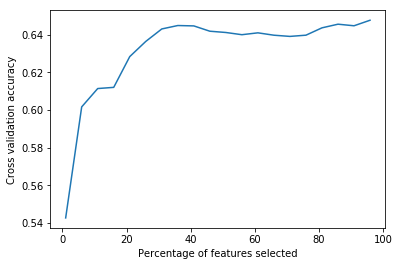

In [323]:
## 1.c Feature Selection

## Borrowed from Titanic.ipynb

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn import cross_validation

# Create linear regression object
linreg = LinearRegression()

percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    X_train_fs = fs.fit_transform(communityRecords, communityTarget)
    scores = cross_validation.cross_val_score(linreg, X_train_fs, communityTarget, cv=5)
    print i,scores.mean()
    results = np.append(results, scores.mean())

optimal_percentile = np.where(results == results.max())[0]

print "Optimal percentile of features:{0}".format(percentiles[optimal_percentile[0]]), "\n"
optimal_num_features = int(percentiles[optimal_percentile[0]]*len(communityRecords.columns)/100)
print "Optimal number of features:{0}".format(optimal_num_features), "\n"

# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)

In [324]:
## The above shows that the optimal number of features is 93.
## However, the difference in accuracy between 96% and 36% is a mere 0.0028
## We may be able to get away with 35 features instead.
## I'm leaving at 93 features for this exercise

In [325]:
## Only 4 features are eliminated. 93 remain.

fs = feature_selection.SelectKBest(feature_selection.f_regression, optimal_num_features)
X_train_fs = fs.fit_transform(communityRecords, communityTarget)

np.set_printoptions(suppress=True, precision=2, linewidth=80)
print fs.get_support()
print ''
print fs.scores_


[ True False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True]

[ 310.37    2.43 1319.69 1758.77    2.82  187.14    7.31   47.98   19.86
    9.03  302.12   13.49  437.16  205.05   47.83  990.7    28.12  982.2
   19.49  475.84  281.88   91.23  163.47   16.58   49.42   32.31  126.71
  499.03  745.6   405.11  607.31  218.93  679.15  246.17    4.03   10.23
  759.58  203.7   891.49  876.51   40.2  1987.06 2388.62 1588.38 1550.53
    1.01   46.2   567.98 2381.98  188.81   6

In [326]:
## The most informative variables and their weights

for i in range(len(communityRecords.columns.values)):
    if fs.get_support()[i]:
        print communityRecords.columns.values[i],'\t', fs.scores_[i] 

population 	310.3699187794882
racepctblack 	1319.6864331392997
racePctWhite 	1758.7722734698782
racePctAsian 	2.8234708278548566
racePctHisp 	187.14122817140472
agePct12t21 	7.312480609948008
agePct12t29 	47.97673138556648
agePct16t24 	19.85654704495788
agePct65up 	9.02864973382466
numbUrban 	302.12358081965607
pctUrban 	13.493298859851565
medIncome 	437.15907430047895
pctWWage 	205.05204164376065
pctWFarmSelf 	47.82798288445441
pctWInvInc 	990.7009746507583
pctWSocSec 	28.117222150615987
pctWPubAsst 	982.2004678917874
pctWRetire 	19.49312125780666
medFamInc 	475.83760176336517
perCapInc 	281.87826488529333
whitePerCap 	91.23497201984095
blackPerCap 	163.47149742827662
indianPerCap 	16.579651905714364
AsianPerCap 	49.4202657929624
OtherPerCap 	32.31415322276217
HispPerCap 	126.71193781044799
NumUnderPov 	499.02544864493086
PctPopUnderPov 	745.5991594323094
PctLess9thGrade 	405.11053195132547
PctNotHSGrad 	607.3093251900438
PctBSorMore 	218.92702833666706
PctUnemployed 	679.145660492673

In [327]:
## perform regression and determine absolute error

linreg = LinearRegression()

scores = cross_validation.cross_val_score(linreg, X_train_fs, communityTarget, scoring='neg_mean_absolute_error', cv=5)

print "Mean absolute error on cv: {0:.3f}".format(scores.mean())

Mean absolute error on cv: -0.097


In [328]:
## 1.d ridge regression and lasso regression

## split data

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(communityRecords, communityTarget, test_size=0.2, random_state=33)

In [329]:
X_train.head()

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
1184        0.01           0.54          0.02          0.91          0.27   
401         0.99           0.42          0.59          0.44          0.11   
1864        0.01           0.53          0.02          0.95          0.15   
1390        0.07           0.41          0.02          0.97          0.05   
1066        0.05           0.41          0.11          0.85          0.23   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  \
1184         0.04         0.37         0.41         0.25        0.28   
401          0.11         0.44         0.56         0.37        0.39   
1864         0.03         0.27         0.37         0.18        0.23   
1390         0.02         0.32         0.49         0.31        0.44   
1066         0.03         0.32         0.52         0.26        0.10   

      numbUrban  pctUrban  medIncome  pctWWage  pctWFarmSelf  pctWInvInc  \
1184       0.02       1.0       0.89      0.74          0.15        0.83   
401        0.99       1.0       0.20      0.45          0.11        0.44   
1864       0.00       0.0       0.82      0.82          0.45        0.75   
1390       0.09       1.0       0.49      0.63          0.17        0.52   
1066       0.07       1.0       0.57      0.92          0.36        0.68   

      pctWSocSec  pctWPubAsst  pctWRetire  medFamInc  perCapInc  whitePerCap  \
1184        0.35         0.02        0.40       0.88       0.76         0.75   
401         0.48         0.75        0.47       0.21       0.20         0.28   
1864        0.21         0.05        0.29       0.77       0.67         0.65   
1390        0.51         0.24        0.59       0.51       0.45         0.44   
1066        0.11         0.04        0.23       0.58       0.53         0.53   

      blackPerCap  indianPerCap  AsianPerCap  OtherPerCap  HispPerCap  \
1184         0.88          0.46         0.44         0.47        0.63   
401          0.18          0.13         0.15         0.18        0.22   
1864         0.94          1.00         0.43         0.50        0.49   
1390         0.31          0.26         0.27         0.46        0.55   
1066         0.40          0.41         0.41         0.43        0.57   

      NumUnderPov  PctPopUnderPov  PctLess9thGrade  PctNotHSGrad  PctBSorMore  \
1184         0.00            0.05             0.06          0.09         0.77   
401          1.00            0.59             0.33          0.49         0.22   
1864         0.00            0.05             0.13          0.15         0.69   
1390         0.02            0.10             0.10          0.19         0.34   
1066         0.01            0.07             0.04          0.06         0.80   

      PctUnemployed  PctEmploy  PctEmplManu  PctEmplProfServ  MalePctDivorce  \
1184           0.19       0.63         0.36             0.29            0.22   
401            0.59       0.42         0.51             0.45            0.62   
1864           0.09       0.78         0.43             0.40            0.26   
1390           0.33       0.64         0.25             0.42            0.36   
1066           0.08       0.89         0.36             0.43            0.30   

      MalePctNevMarr  FemalePctDiv  TotalPctDiv  PersPerFam  PctFam2Par  \
1184            0.36          0.24         0.23        0.53        0.89   
401             0.69          0.61         0.64        0.55        0.18   
1864            0.27          0.26         0.26        0.51        0.96   
1390            0.53          0.38         0.38        0.52        0.71   
1066            0.33          0.38         0.35        0.44        0.86   

      PctKids2Par  PctYoungKids2Par  PctTeen2Par  PctWorkMomYoungKids  \
1184         0.92              0.97         0.81                 0.17   
401          0.21              0.20         0.16                 0.45   
1864         0.96              0.96         0.88                 0.34   
1390         0.76     

In [330]:
y_train.head()

ViolentCrimesPerPop
1184                 0.08
401                  0.40
1864                 0.02
1390                 0.18
1066                 0.07

In [331]:
X_test.head()

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
1158        0.00           0.46          0.01          0.97          0.09   
1079        0.01           0.35          0.01          0.96          0.04   
1633        0.51           0.31          0.60          0.46          0.06   
1700        0.02           0.52          0.25          0.63          0.03   
1956        0.03           0.37          0.40          0.68          0.03   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  \
1158         0.04         0.40         0.26         0.20        0.49   
1079         0.04         0.32         0.45         0.29        0.62   
1633         0.09         0.42         0.54         0.39        0.48   
1700         0.31         0.54         0.62         0.44        0.36   
1956         0.01         0.39         0.47         0.34        0.55   

      numbUrban  pctUrban  medIncome  pctWWage  pctWFarmSelf  pctWInvInc  \
1158       0.02      1.00       1.00      0.55          1.00        0.88   
1079       0.02      0.94       0.30      0.45          0.10        0.39   
1633       0.52      1.00       0.11      0.28          0.15        0.34   
1700       0.00      0.00       0.26      0.60          0.71        0.34   
1956       0.04      1.00       0.23      0.52          0.17        0.36   

      pctWSocSec  pctWPubAsst  pctWRetire  medFamInc  perCapInc  whitePerCap  \
1158        0.42         0.09        0.46       1.00       1.00         1.00   
1079        0.62         0.38        0.38       0.34       0.32         0.32   
1633        0.57         0.92        0.53       0.15       0.18         0.22   
1700        0.43         0.37        0.26       0.27       0.31         0.37   
1956        0.56         0.35        0.44       0.27       0.28         0.32   

      blackPerCap  indianPerCap  AsianPerCap  OtherPerCap  HispPerCap  \
1158         1.00          0.81         0.71         0.24        1.00   
1079         0.21          0.08         0.05         0.17        0.22   
1633         0.20          0.13         0.23         0.15        0.19   
1700         0.12          0.16         0.30         0.25        0.27   
1956         0.19          0.17         0.29         0.24        0.17   

      NumUnderPov  PctPopUnderPov  PctLess9thGrade  PctNotHSGrad  PctBSorMore  \
1158         0.00            0.07             0.04          0.04         0.97   
1079         0.01            0.24             0.44          0.58         0.20   
1633         0.74            0.68             0.43          0.57         0.24   
1700         0.03            0.46             0.46          0.54         0.29   
1956         0.03            0.31             0.47          0.59         0.22   

      PctUnemployed  PctEmploy  PctEmplManu  PctEmplProfServ  MalePctDivorce  \
1158           0.16       0.38         0.20             0.64            0.24   
1079           0.41       0.48         0.58             0.32            0.45   
1633           0.80       0.27         0.36             0.63            0.60   
1700           0.35       0.47         0.49             0.27            0.56   
1956           0.22       0.52         0.64             0.25            0.60   

      MalePctNevMarr  FemalePctDiv  TotalPctDiv  PersPerFam  PctFam2Par  \
1158            0.21          0.20         0.22        0.37        0.97   
1079            0.40          0.45         0.47        0.39        0.53   
1633            0.74          0.59         0.62        0.45        0.12   
1700            0.41          0.60         0.60        0.53        0.57   
1956            0.37          0.52         0.57        0.38        0.49   

      PctKids2Par  PctYoungKids2Par  PctTeen2Par  PctWorkMomYoungKids  \
1158         0.95              0.97         0.91                 0.25   
1079         0.58              0.61         0.59                 0.64   
1633         0.21              0.19         0.13                 0.31   
1700         0.49     

In [332]:
y_test.head()

ViolentCrimesPerPop
1158                 0.06
1079                 0.14
1633                 0.80
1700                 0.50
1956                 0.30

In [333]:
## from Titanic.ipynb

from sklearn.cross_validation import KFold

def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        print param_name, ' = ', param_value
        
        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(len(X), K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        for j, (train, test) in enumerate(cv):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit([X[k] for k in train], y[train])
            k_train_scores[j] = clf.score([X[k] for k in train], y[train])
            k_test_scores[j] = clf.score([X[k] for k in test], y[test])
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

alpha  =  0.01
alpha  =  0.41795918367346935
alpha  =  0.8259183673469387
alpha  =  1.233877551020408
alpha  =  1.6418367346938774
alpha  =  2.0497959183673466
alpha  =  2.457755102040816
alpha  =  2.865714285714285
alpha  =  3.2736734693877545
alpha  =  3.681632653061224
alpha  =  4.0895918367346935
alpha  =  4.497551020408163
alpha  =  4.905510204081632
alpha  =  5.313469387755101
alpha  =  5.721428571428571
alpha  =  6.12938775510204
alpha  =  6.537346938775509
alpha  =  6.9453061224489785
alpha  =  7.353265306122448
alpha  =  7.761224489795917
alpha  =  8.169183673469387
alpha  =  8.577142857142857
alpha  =  8.985102040816326
alpha  =  9.393061224489795
alpha  =  9.801020408163264
alpha  =  10.208979591836734
alpha  =  10.616938775510203
alpha  =  11.024897959183672
alpha  =  11.432857142857141
alpha  =  11.84081632653061
alpha  =  12.24877551020408
alpha  =  12.65673469387755
alpha  =  13.064693877551019
alpha  =  13.472653061224488
alpha  =  13.880612244897957
alpha  =  14.288571

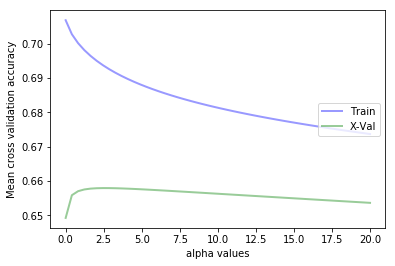

In [334]:
## Ridge Regression
##    X = X_train
##    y = y_train
##    clf = sklearn.linear_model.Ridge()
##    param_values = various alpha values
##    param_name = alpha
##    K = 5

alphas = np.linspace(.01, 20, 50)
ridge2 = Ridge(fit_intercept=True)

train_scores, test_scores = calc_params(X_train, y_train, ridge2, alphas, 'alpha', 5)

In [345]:
## You should also plot the error values on the training and crossvalidation splits 
## across the specified values of the alphaparameter

## From Regression-scikit-learn.ipynb

print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(.01,20,50)
t_rmse = np.array([])
cv_rmse = np.array([])

## Convert training sets to arrays
x = np.array(X_train)
y = np.array(y_train)

for a in alpha:
    ridge = Ridge(alpha=a)
    
    # computing the RMSE on training data
    ridge.fit(X_train, y_train)
    p = ridge.predict(X_train)
    err = np.squeeze(p-y_train)
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(p))

    # computing RMSE using 10-fold cross validation
    kf = KFold(len(x), n_folds=5)
    xval_err = 0
    for train, test in kf:
        ridge.fit(x[train], y[train])
        p = ridge.predict(x[test])
        err = np.squeeze(p - y[test])
        xval_err += np.sqrt(np.dot(err,err)/len(x[test]))
    rmse_10cv = xval_err/n
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_10cv

0.010	 0.1262		 0.0671
0.418	 0.1268		 0.0666
0.826	 0.1273		 0.0666
1.234	 0.1276		 0.0666
1.642	 0.1279		 0.0666
2.050	 0.1281		 0.0667
2.458	 0.1284		 0.0667
2.866	 0.1286		 0.0667
3.274	 0.1288		 0.0667
3.682	 0.1289		 0.0668
4.090	 0.1291		 0.0668
4.498	 0.1292		 0.0668
4.906	 0.1294		 0.0669
5.313	 0.1295		 0.0669
5.721	 0.1296		 0.0669
6.129	 0.1297		 0.0669
6.537	 0.1298		 0.0670
6.945	 0.1299		 0.0670
7.353	 0.1300		 0.0670
7.761	 0.1301		 0.0670
8.169	 0.1302		 0.0670
8.577	 0.1303		 0.0671
8.985	 0.1304		 0.0671
9.393	 0.1305		 0.0671
9.801	 0.1306		 0.0671
10.209	 0.1306		 0.0671
10.617	 0.1307		 0.0672
11.025	 0.1308		 0.0672
11.433	 0.1308		 0.0672
11.841	 0.1309		 0.0672
12.249	 0.1310		 0.0672
12.657	 0.1310		 0.0673
13.065	 0.1311		 0.0673
13.473	 0.1312		 0.0673
13.881	 0.1312		 0.0673
14.289	 0.1313		 0.0673
14.697	 0.1313		 0.0673
15.104	 0.1314		 0.0673
15.512	 0.1314		 0.0674
15.920	 0.1315		 0.0674
16.328	 0.1315		 0

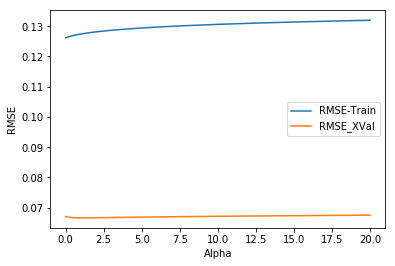

In [346]:
pl.plot(alpha, t_rmse, label='RMSE-Train')
pl.plot(alpha, cv_rmse, label='RMSE_XVal')
pl.legend( ('RMSE-Train', 'RMSE_XVal') )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

In [349]:
## Rerun this with new alpha from above

ridge = Ridge(fit_intercept=True, alpha=0.418)
ridge.fit(X_train, y_train)

# Compute RMSE using 10-fold x-validation

n = 5
kf = KFold(len(X_test), n_folds=n)
xval_err = 0
for train,test in kf:
    p = ridge.predict(X_test)
    e = np.squeeze(p-y_test)
    xval_err += np.sqrt(np.dot(e,e)/len(X_test))
rmse_10cv = xval_err/n

method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('RMSE on 5-fold CV: %.4f' %rmse_10cv)

Method: Ridge Regression
RMSE on 5-fold CV: 0.1432


alpha  =  0.01
alpha  =  0.41795918367346935
alpha  =  0.8259183673469387
alpha  =  1.233877551020408
alpha  =  1.6418367346938774
alpha  =  2.0497959183673466
alpha  =  2.457755102040816
alpha  =  2.865714285714285
alpha  =  3.2736734693877545
alpha  =  3.681632653061224
alpha  =  4.0895918367346935
alpha  =  4.497551020408163
alpha  =  4.905510204081632
alpha  =  5.313469387755101
alpha  =  5.721428571428571
alpha  =  6.12938775510204
alpha  =  6.537346938775509
alpha  =  6.9453061224489785
alpha  =  7.353265306122448
alpha  =  7.761224489795917
alpha  =  8.169183673469387
alpha  =  8.577142857142857
alpha  =  8.985102040816326
alpha  =  9.393061224489795
alpha  =  9.801020408163264
alpha  =  10.208979591836734
alpha  =  10.616938775510203
alpha  =  11.024897959183672
alpha  =  11.432857142857141
alpha  =  11.84081632653061
alpha  =  12.24877551020408
alpha  =  12.65673469387755
alpha  =  13.064693877551019
alpha  =  13.472653061224488
alpha  =  13.880612244897957
alpha  =  14.288571

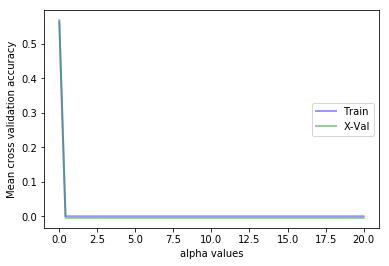

In [350]:
## Lasso Regression
##    X = X_train
##    y = y_train
##    clf = sklearn.linear_model.Ridge()
##    param_values = various alpha values
##    param_name = alpha
##    K = 5

alphas = np.linspace(.01, 20, 50)
lasso = Lasso(fit_intercept=True)

train_scores, test_scores = calc_params(X_train, y_train, lasso, alphas, 'alpha', 5)

In [370]:
## You should also plot the error values on the training and crossvalidation splits 
## across the specified values of the alphaparameter

## From Regression-scikit-learn.ipynb

print('Lasso Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(.01,5,50)
t_rmse = np.array([])
cv_rmse = np.array([])

## Convert training sets to arrays
x = np.array(X_train)
y = np.array(y_train)

for a in alpha:
    
    lasso = Lasso(fit_intercept=True, alpha=a)
    
    # computing the RMSE on training data
    lasso.fit(X_train, y_train)
    p = lasso.predict(X_train)
    err = np.squeeze(p-y_train.T)
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(p))

    # computing RMSE using 10-fold cross validation
    kf = KFold(len(x), n_folds=5)
    xval_err = 0
    for train, test in kf:
        lasso.fit(x[train], y[train])
        p = lasso.predict(x[test])
        err = p - np.squeeze(y[test].T)
        xval_err += np.sqrt(np.dot(err,err)/len(x[test]))
    rmse_10cv = xval_err/n
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))

Lasso Regression
alpha	 RMSE_train	 RMSE_10cv

0.010	 0.1520		 0.1521
0.112	 0.2312		 0.2310
0.214	 0.2312		 0.2310
0.316	 0.2312		 0.2310
0.417	 0.2312		 0.2310
0.519	 0.2312		 0.2310
0.621	 0.2312		 0.2310
0.723	 0.2312		 0.2310
0.825	 0.2312		 0.2310
0.927	 0.2312		 0.2310
1.028	 0.2312		 0.2310
1.130	 0.2312		 0.2310
1.232	 0.2312		 0.2310
1.334	 0.2312		 0.2310
1.436	 0.2312		 0.2310
1.538	 0.2312		 0.2310
1.639	 0.2312		 0.2310
1.741	 0.2312		 0.2310
1.843	 0.2312		 0.2310
1.945	 0.2312		 0.2310
2.047	 0.2312		 0.2310
2.149	 0.2312		 0.2310
2.250	 0.2312		 0.2310
2.352	 0.2312		 0.2310
2.454	 0.2312		 0.2310
2.556	 0.2312		 0.2310
2.658	 0.2312		 0.2310
2.760	 0.2312		 0.2310
2.861	 0.2312		 0.2310
2.963	 0.2312		 0.2310
3.065	 0.2312		 0.2310
3.167	 0.2312		 0.2310
3.269	 0.2312		 0.2310
3.371	 0.2312		 0.2310
3.472	 0.2312		 0.2310
3.574	 0.2312		 0.2310
3.676	 0.2312		 0.2310
3.778	 0.2312		 0.2310
3.880	 0.2312		 0.2310
3.982	 0.2312		 0.2310
4.083	 0.2312		 0.2310
4.185	 0.2

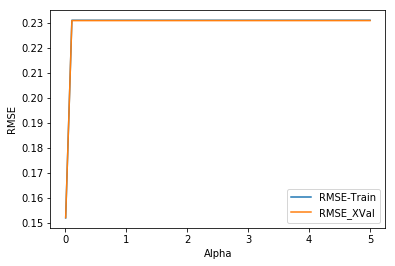

In [371]:
pl.plot(alpha, t_rmse, label='RMSE-Train')
pl.plot(alpha, cv_rmse, label='RMSE_XVal')
pl.legend( ('RMSE-Train', 'RMSE_XVal') )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

In [372]:
## Rerun this with new alpha from above
lasso = Lasso(fit_intercept=True, alpha=0.01)
lasso.fit(X_train, y_train)

n = 5
kf = KFold(len(X_test), n_folds=n)
xval_err = 0
for train,test in kf:
    p = lasso.predict(X_test)
    #e = np.squeeze(p-y_test.T) 
    e = np.squeeze(p-y_test.T) ## why do I need to transpose here but not for ridge?
    xval_err += np.sqrt(np.dot(e,e)/len(X_test))
rmse_10cv = xval_err/n

method_name = 'Lasso Regression'
print('Method: %s' %method_name)
print('RMSE on 5-fold CV: %.4f' %rmse_10cv)

Method: Lasso Regression
RMSE on 5-fold CV: 0.1643


In [374]:
## 1.e Stochastic Gradient Descent

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(xArr)
x_s = scaler.transform(xArr)

## Split to training and test

xTrain, xTest, yTrain, yTest = train_test_split(x_s, yArr, test_size=0.2, random_state=33)


In [381]:
from sklearn.grid_search import GridSearchCV

sgdreg = SGDRegressor()

parameters = {
    'penalty': ['l2','l1'],
    'alpha': np.linspace(0.0001,10,50)
}

gs = GridSearchCV(sgdreg, parameters, verbose=1, cv=5)

%time _ = gs.fit(xTrain, yTrain)

gs.best_params_, gs.best_score_


Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Wall time: 3.78 s


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.7s finished


({'alpha': 0.20417959183673468, 'penalty': 'l2'}, 0.6522933145602798)

In [383]:
## apply model to test data

sgdreg = SGDRegressor(penalty='l2', alpha=0.20417959183673468)

# Compute RMSE on training data
sgdreg.fit(xTrain,yTrain)
p = sgdreg.predict(xTest)
err = p-yTest
total_error = np.dot(err,err)
rmse_test = np.sqrt(total_error/len(p))

method_name = 'Stochastic Gradient Descent Regression'
print('Method: %s' %method_name)
print('RMSE on test: %.4f' %rmse_test)

Method: Stochastic Gradient Descent Regression
RMSE on test: 0.1545


In [ ]:
# 2. Automatic Document Clustering

In [511]:
from numpy import *

# 2.a - Distance Function - Cosine Similarity

def distCosine(vecA, vecB):
    return np.dot(vecA,vecB)/(np.linalg.norm(vecA) * np.linalg.norm(vecB))

In [554]:
# 2.b load data set

## Read term matrix (9328 terms, 2500 documents)
## Term frequency matrix where each column appears to be a document.
termMatrix = pd.read_csv('matrix.txt', header=None)
terms = pd.read_csv('terms.txt', header=None)

## Transpose Matrix
DT = termMatrix.T

DT.head()

0     1     2     3     4     5     6     7     8     9     10    11    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     1     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   12    13    14    15    16    17    18    19    20    21    22    23    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   24    25    26    27    28    29    30    31    32    33    34    35    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     2     0     0     0     0   

   36    37    38    39    40    41    42    43    44    45    46    47    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     1   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     1     0     0     0     0   

   48    49    50    51    52    53    54    55    56    57    58    59    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   60    61    62    63    64    65    66    67    68    69    70    71    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     1     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   72    73    74    75    76    77    78    79    80    81    82    83    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   84    85    86    87    88    89    90    91    92    93    94    95    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     1     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   96    97    98    99    100   101   102   103   104   105   106   107   \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     1     0     0 

In [555]:
numTerms=len(terms)
numTerms

9328

In [556]:
# Find doucment frequencies for each term
DF = np.array([(DT!=0).sum(0)])
print DF

[[10  6 22 ...  3  3  4]]


In [557]:
NDocs = len(DT[0])
print NDocs

2500


In [559]:
# Create a matrix with all entries = NDocs
NMatrix=np.ones(np.shape(DT), dtype=float)*NDocs
NMatrix

array([[2500., 2500., 2500., ..., 2500., 2500., 2500.],
       [2500., 2500., 2500., ..., 2500., 2500., 2500.],
       [2500., 2500., 2500., ..., 2500., 2500., 2500.],
       ...,
       [2500., 2500., 2500., ..., 2500., 2500., 2500.],
       [2500., 2500., 2500., ..., 2500., 2500., 2500.],
       [2500., 2500., 2500., ..., 2500., 2500., 2500.]])

In [560]:
# Convert each entry into IDF values
# Note that IDF is only a function of the term, so all rows will be identical.
DivM = np.divide(NMatrix, DF)
IDF = np.log2(DivM)

In [561]:
np.set_printoptions(precision=2,suppress=True)
print IDF[0:2,]

[[7.97 8.7  6.83 ... 9.7  9.7  9.29]
 [7.97 8.7  6.83 ... 9.7  9.7  9.29]]


In [563]:
# Compute the TFxIDF values for each document-term entry
DT_tfidf = DT * IDF

DT_tfidf.head()

0     1     2     3     4     5     6     7     8         9     10    11    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  3.861448   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   

   12    13    14    15    16    17    18    19    20    21    22    23    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   24    25    26    27    28    29    30        31    32    33    34    35    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0  7.591719   0.0   0.0   0.0   0.0   

   36    37    38    39    40    41    42        43    44    45    46    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0  4.878321   0.0   0.0   0.0   

       47    48    49    50    51    52    53    54    55    56    57    58    \
0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1  6.828281   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   59    60    61    62    63    64        65    66    67    68    69    70    \
0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0  5.532825   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   

   71    72    73    74    75    76    77    78    79    80    81    82    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   83    84    85    86    87    88    89    90    91    92        93    94    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  5.673003   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   

   95    96    97    98    99    100   101   102   103       104   105   106   \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   
1   0.0   0.0   0.0   0.0   0

In [564]:
import kMeans

In [565]:
reload(kMeans)

<module 'kMeans' from 'kMeans.pyc'>

In [566]:
## long execution time using the cosine function, ran 45 minutes without completion.
## using euclidian to keep going

DT_tfidf = np.array(DT_tfidf)
centroids_tfidf, clusters_tfidf = kMeans.kMeans(DT_tfidf, 3, kMeans.distEuclid, kMeans.randCent)

In [573]:
centroids_tfidf

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.05, 0.02, 0.22, ..., 0.04, 0.02, 0.06],
       [0.  , 0.  , 0.  , ..., 2.43, 0.  , 0.  ]])

In [576]:
terms = np.array(terms)
terms[1]

array(['aargh'], dtype=object)

In [593]:
print "\t\t\t\t\t\tCluster0\tCluster1\tCluster2"
for i in range(len(terms)):
    print "%40s\t%.4f\t\t%.4f\t\t%.4f" %(terms[i],centroids_tfidf[0][i],centroids_tfidf[1][i],centroids_tfidf[2][i])

						Cluster0	Cluster1	Cluster2
                                  ['aa']	0.0000		0.0511		0.0000
                               ['aargh']	0.0000		0.0209		0.0000
                               ['aaron']	0.0000		0.2246		0.0000
                              ['aaronc']	0.0000		0.0391		0.0000
                                  ['ab']	2.5291		0.0883		0.0000
                             ['abandon']	0.0000		0.0326		0.0000
                                 ['abc']	0.0000		0.1433		0.0000
                                ['abid']	0.0000		0.0156		0.0000
                                ['abil']	0.0000		0.1715		0.0000
                                 ['abl']	0.0000		0.3284		0.0000
                              ['abomin']	0.0000		0.0261		0.0000
                               ['abort']	0.0000		0.0117		0.0000
                              ['abound']	0.0000		0.0180		0.0000
                             ['abraham']	0.0000		0.0272		0.0000
                              ['abridg']	0.0000		0.0149		0.0000
       

                              ['center']	0.0000		0.1898		0.0000
                               ['centr']	0.0000		0.0570		0.0000
                             ['central']	0.0000		0.0734		0.0000
                       ['centralsuncom']	0.0000		0.0156		0.0000
                             ['centuri']	0.0000		0.1059		0.0000
                           ['centurion']	0.0000		0.0156		0.0000
                                 ['ceo']	0.0000		0.0149		0.0000
                                ['cept']	0.0000		0.0117		0.0000
                            ['ceremoni']	0.0000		0.1497		0.0000
                             ['certain']	0.0000		0.2311		0.0000
                           ['certainli']	0.0000		0.2656		0.0000
                           ['certainti']	0.0000		0.0324		0.0000
                              ['certif']	0.0000		0.0266		0.0000
                             ['certifi']	0.0000		0.0209		0.0000
                                  ['cf']	0.0000		0.0847		0.0000
                                 ['cfw']

                             ['dresser']	0.0000		0.0117		0.0000
                                ['drew']	0.0000		0.0463		0.0000
                                 ['dri']	0.0000		0.0117		0.0000
                              ['dribbl']	0.0000		0.0149		0.0000
                               ['drift']	0.0000		0.0156		0.0000
                               ['drill']	0.0000		0.0149		0.0000
                               ['drink']	0.0000		0.0351		0.0000
                               ['drive']	0.0000		0.5536		0.0000
                              ['drivel']	0.0000		0.0180		0.0000
                              ['driven']	0.0000		0.0351		0.0000
                              ['driver']	0.0000		0.5641		0.0000
                              ['droopi']	0.0000		0.0408		0.0000
                                ['drop']	0.0000		0.1329		0.0000
                               ['drove']	0.0000		0.0293		0.0000
                           ['drozinski']	0.0000		0.0261		0.0000
                            ['drozinst']

                             ['gretzki']	0.0000		0.1441		0.0000
                                ['grew']	0.0000		0.0326		0.0000
                                ['grip']	0.0000		0.0180		0.0000
                               ['gripe']	0.0000		0.0244		0.0000
                              ['groger']	0.0000		0.0149		0.0000
                              ['ground']	0.0000		0.0977		0.0000
                               ['group']	0.0000		0.4519		0.0000
                                ['grow']	0.0000		0.0982		0.0000
                               ['grown']	0.0000		0.0117		0.0000
                              ['growth']	0.0000		0.0306		0.0000
                                 ['grp']	0.0000		0.0377		0.0000
                                  ['gs']	2.7059		0.0554		0.0000
                                  ['gt']	0.0000		0.0593		0.0000
                                 ['gtl']	0.0000		0.0447		0.0000
                               ['gtoal']	0.0000		0.0693		0.0000
                            ['gtoalcom']

                                ['lair']	0.0000		0.0234		0.0000
                             ['laissez']	0.0000		0.0982		0.0000
                                 ['lak']	3.2342		0.0195		0.0000
                                ['lake']	0.0000		0.0450		0.0000
                   ['lamarcolostateedu']	0.0000		0.0288		0.0000
                                ['lamb']	0.0000		0.0324		0.0000
                   ['lambdamsfcnasagov']	0.0000		0.0149		0.0000
                              ['lament']	0.0000		0.0186		0.0000
                                ['lamp']	0.0000		0.0266		0.0000
                                 ['lan']	0.0000		0.0586		2.0294
                                ['lanc']	0.0000		0.0272		0.0000
                             ['lancast']	0.0000		0.0234		0.0000
                   ['lancecolostateedu']	0.0000		0.0209		0.0000
                                ['land']	0.0000		0.0973		0.0000
                            ['landscap']	0.0000		0.0180		0.0000
                                ['lang']

               ['nextworkrosehulmanedu']	0.0000		0.0293		0.0000
                                  ['nf']	0.0000		0.0349		0.0000
                                 ['nfl']	0.0000		0.0299		0.0000
                                  ['ng']	0.0000		0.0639		0.0000
                                 ['ngt']	0.0000		0.0224		0.0000
                                 ['ngu']	0.0000		0.0739		0.0000
                                ['ngvz']	0.0000		0.0195		0.0000
                                 ['ngw']	0.0000		0.0156		0.0000
                                  ['nh']	0.0000		0.0598		0.0000
                                 ['nhl']	0.0000		0.4024		0.0000
                               ['nhler']	0.0000		0.0186		0.0000
                               ['nhlpa']	0.0000		0.0288		0.0000
                                ['nhma']	0.0000		0.0238		0.0000
                                  ['ni']	0.0000		0.0335		0.0000
                 ['niblickecnpurdueedu']	0.0000		0.0149		0.0000
                                ['nice']

                              ['raider']	0.0000		0.0149		0.0000
                                ['rain']	0.0000		0.0358		0.0000
                       ['rainierattcom']	0.0000		0.0117		0.0000
                                ['rais']	0.0000		0.1633		0.0000
                                 ['raj']	0.0000		0.0186		0.0000
                                ['ralf']	0.0000		0.0311		0.0000
                               ['ralli']	0.0000		0.0156		0.0000
                               ['ralph']	0.0000		0.0533		0.0000
                 ['ralphcshaverfordedu']	0.0000		0.0234		0.0000
                                 ['ram']	0.0000		0.1909		0.0000
                               ['rambl']	0.0000		0.0238		0.0000
                    ['ramblerengsuncom']	0.0000		0.0180		0.0000
                             ['ramdriv']	0.0000		0.0311		0.0000
                              ['ramsei']	0.0000		0.0252		0.0000
                ['ramseycslaurentianca']	0.0000		0.1359		0.0000
                                 ['ran']

                                ['spit']	0.0000		0.0149		0.0000
                               ['spite']	0.0000		0.0149		0.0000
                               ['split']	0.0000		0.0754		0.0000
                               ['spoil']	0.0000		0.0149		0.0000
                               ['spoke']	0.0000		0.0754		0.0000
                              ['spoken']	0.0000		0.0244		0.0000
                             ['sponsor']	0.0000		0.0299		0.0000
                               ['spoof']	0.0000		0.0539		0.0000
                               ['spook']	0.0000		0.0614		0.0000
                               ['spool']	0.0000		0.0156		0.0000
                               ['sport']	0.0000		0.1725		0.0000
                          ['sportscent']	0.0000		0.0117		0.0000
                       ['sportschannel']	0.0000		0.0419		0.0000
                                ['spot']	0.0000		0.0822		0.0000
                     ['spotcoloradoedu']	0.0000		0.0822		0.0000
                               ['spous']

                            ['vcdhpcom']	0.0000		0.0298		0.0000
                                 ['vcr']	0.0000		0.0408		0.0000
                                  ['vd']	0.0000		0.0195		0.0000
                                 ['vdz']	0.0000		0.0350		0.0000
                              ['vector']	0.0000		0.0350		0.0000
                                ['vega']	0.0000		0.0186		0.0000
                              ['vehicl']	0.0000		0.0272		0.0000
                                 ['vei']	0.0000		0.0373		0.0000
                                ['veil']	0.0000		0.0180		0.0000
                                ['vein']	0.0000		0.0293		0.0000
                   ['velaacsoaklandedu']	0.0000		0.0731		0.0000
                             ['velasco']	0.0000		0.0374		0.0000
                              ['vendor']	0.0000		0.0712		0.0000
                               ['vener']	0.0000		0.0186		0.0000
                              ['venial']	0.0000		0.0117		0.0000
                              ['venido']

In [594]:
DT = np.array(DT)
centroids, clusters = kMeans.kMeans(DT, 3, kMeans.distEuclid, kMeans.randCent)

In [595]:
print "\t\t\t\t\t\tCluster0\tCluster1\tCluster2"
for i in range(len(terms)):
    print "%40s\t%.4f\t\t%.4f\t\t%.4f" %(terms[i],centroids[0][i],centroids[1][i],centroids[2][i])

						Cluster0	Cluster1	Cluster2
                                  ['aa']	0.0064		0.0000		0.0000
                               ['aargh']	0.0024		0.0000		0.0000
                               ['aaron']	0.0329		0.0000		0.0000
                              ['aaronc']	0.0048		0.0000		0.0000
                                  ['ab']	0.0116		0.0000		0.3333
                             ['abandon']	0.0040		0.0000		0.0000
                                 ['abc']	0.0225		0.0000		0.0000
                                ['abid']	0.0016		0.0000		0.0000
                                ['abil']	0.0313		0.0000		0.0000
                                 ['abl']	0.0850		0.0000		0.0000
                              ['abomin']	0.0028		0.0000		0.0000
                               ['abort']	0.0012		0.0000		0.0000
                              ['abound']	0.0020		0.0000		0.0000
                             ['abraham']	0.0032		0.0000		0.0000
                              ['abridg']	0.0016		0.0000		0.0000
       

                               ['casio']	0.0016		0.0000		0.0000
                              ['cassel']	0.0048		0.0000		0.0000
                             ['cassett']	0.0100		0.0000		0.0000
                                ['cast']	0.0104		0.0000		0.0000
                              ['casual']	0.0024		0.0000		0.0000
                                 ['cat']	0.0040		0.0000		0.0000
                            ['catagori']	0.0012		0.0000		0.0000
                             ['catalog']	0.0084		0.0000		0.0000
                          ['catastroph']	0.0016		0.0000		0.0000
                               ['catch']	0.0080		0.0000		0.0000
                              ['catech']	0.0016		0.0000		0.0000
                           ['catechist']	0.0024		0.0000		0.0000
                            ['categori']	0.0060		0.0000		0.0000
                            ['cathedra']	0.0016		0.0000		0.0000
                              ['cathol']	0.0710		0.0000		0.0000
                              ['cation']

                              ['dislik']	0.0024		0.0000		0.0000
                             ['dismiss']	0.0040		0.0000		0.0000
                            ['disobedi']	0.0096		0.0000		0.0000
                             ['disobei']	0.0040		0.0000		0.0000
                              ['disord']	0.0012		0.0000		0.0000
                             ['dispers']	0.0044		0.0000		0.0000
                             ['displai']	0.0349		0.0000		0.0000
                             ['disprov']	0.0036		0.0000		0.0000
                              ['disput']	0.0056		0.0000		0.0000
                           ['disregard']	0.0028		0.0000		0.0000
                             ['disrupt']	0.0024		0.0000		0.0000
                          ['dissatisfi']	0.0016		0.0000		0.0000
                             ['dissent']	0.0016		0.0000		0.0000
                              ['dissid']	0.0032		0.0000		0.0000
                              ['disson']	0.0012		0.0000		0.0000
                             ['distanc']

                                  ['gg']	0.0048		0.2500		0.6667
                                  ['gh']	0.0056		0.0000		1.3333
                                 ['ghj']	0.0000		1.5000		0.3333
                              ['ghjbhj']	0.0000		0.7500		1.3333
                            ['ghjbhjkn']	0.0000		0.7500		0.0000
                               ['ghjbj']	0.0000		0.5000		2.0000
                               ['ghjkm']	0.0000		0.2500		1.3333
                               ['ghjkn']	0.0000		2.0000		2.3333
                                ['ghjn']	0.0000		2.0000		1.3333
                               ['ghost']	0.0160		0.0000		0.0000
                         ['ghostscript']	0.0028		0.0000		0.0000
                                  ['gi']	0.0032		2.5000		2.3333
                               ['giant']	0.0076		0.0000		0.0000
                       ['giantsrequest']	0.0012		0.0000		0.0000
                           ['gibberish']	0.0020		0.0000		0.0000
                              ['gibson']

                                 ['kir']	0.0044		0.0000		0.0000
                                ['kirk']	0.0068		0.0000		0.0000
                               ['kisio']	0.0060		0.0000		0.0000
                                ['kiss']	0.0020		0.0000		0.0000
                                 ['kit']	0.0128		0.0000		0.0000
                             ['kitchen']	0.0012		0.0000		0.0000
                           ['kitssfuca']	0.0016		0.0000		0.0000
                                  ['kj']	0.0052		0.0000		2.6667
                                 ['kjr']	0.0048		0.0000		0.0000
                                 ['kjv']	0.0032		0.0000		0.0000
                                 ['kjz']	0.0156		0.0000		2.3333
                               ['kjznb']	0.0012		0.0000		0.3333
                                  ['kk']	0.0108		0.0000		0.0000
                             ['kkeller']	0.0084		0.0000		0.0000
                                ['kkzp']	0.0012		0.0000		0.0000
                               ['klima']

                                ['nahf']	0.0020		0.0000		0.0000
                                 ['nai']	0.0064		0.0000		0.0000
                                ['nail']	0.0028		0.0000		0.0000
                                ['naiv']	0.0036		0.0000		0.0000
                              ['naivet']	0.0016		0.0000		0.0000
                                ['najz']	0.0020		0.0000		0.0000
                                ['nake']	0.0012		0.0000		0.0000
                                ['name']	0.1544		0.0000		0.0000
                             ['namecal']	0.0012		0.0000		0.0000
                               ['nanci']	0.0024		0.0000		0.0000
                          ['nanosecond']	0.0024		0.0000		0.0000
                                ['nari']	0.0012		0.0000		0.0000
                              ['narrow']	0.0036		0.0000		0.0000
                                ['nasa']	0.0056		0.0000		0.0000
                        ['nasakodakcom']	0.0016		0.0000		0.0000
                                ['nasb']

                               ['pursu']	0.0068		0.0000		0.0000
                            ['pursuant']	0.0016		0.0000		0.0000
                                ['push']	0.0257		0.0000		0.0000
                                 ['put']	0.1179		0.0000		0.0000
                              ['putnam']	0.0016		0.0000		0.0000
                                ['putz']	0.0024		0.0000		0.0000
                               ['puzzl']	0.0072		0.0000		0.0000
                                  ['pv']	0.0028		0.5000		0.0000
                                  ['pw']	0.0032		0.2500		2.3333
                              ['pwhite']	0.0016		0.0000		0.0000
                            ['pwiseman']	0.0016		1.0000		1.0000
                                  ['px']	0.0052		0.2500		0.0000
                                  ['py']	0.0036		0.0000		1.3333
                             ['pyramid']	0.0028		0.0000		0.0000
                              ['python']	0.0012		0.0000		0.0000
                                  ['qa']

                                  ['sm']	0.0048		0.0000		0.0000
                               ['smack']	0.0020		0.0000		0.0000
                               ['smail']	0.0020		0.0000		0.0000
                               ['smale']	0.0024		0.0000		0.0000
                               ['small']	0.0401		0.0000		0.0000
                             ['smaller']	0.0076		0.0000		0.0000
                            ['smallest']	0.0020		0.0000		0.0000
                               ['smart']	0.0100		0.0000		0.0000
                           ['smartdriv']	0.0024		0.0000		0.0000
                            ['smartdrv']	0.0048		0.0000		0.0000
                             ['smarter']	0.0012		0.0000		0.0000
                               ['smash']	0.0020		0.0000		0.0000
                                 ['smb']	0.0064		0.0000		0.0000
                             ['smehlik']	0.0044		0.0000		0.0000
                               ['smell']	0.0020		0.0000		0.0000
                                 ['smg']

                             ['unlimit']	0.0044		0.0000		0.0000
                              ['unload']	0.0048		0.0000		0.0000
                              ['unlock']	0.0036		0.0000		0.0000
                             ['unnatur']	0.0032		0.0000		0.0000
                         ['unnecessari']	0.0028		0.0000		0.0000
                              ['unopen']	0.0032		0.0000		0.0000
                             ['unpleas']	0.0016		0.0000		0.0000
                              ['unplug']	0.0012		0.0000		0.0000
                           ['unpopular']	0.0012		0.0000		0.0000
                            ['unpreced']	0.0020		0.0000		0.0000
                           ['unpredict']	0.0020		0.0000		0.0000
                              ['unprov']	0.0028		0.0000		0.0000
                           ['unpublish']	0.0012		0.0000		0.0000
                     ['unquestioningli']	0.0012		0.0000		0.0000
                              ['unread']	0.0024		0.0000		0.0000
                            ['unreason']

In [596]:
## split into train and test
from sklearn.cross_validation import train_test_split
DT_Train, DT_Test = train_test_split(DT, test_size=0.2, random_state=33)

print termTrain[:10]
print termTest[:10]

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
